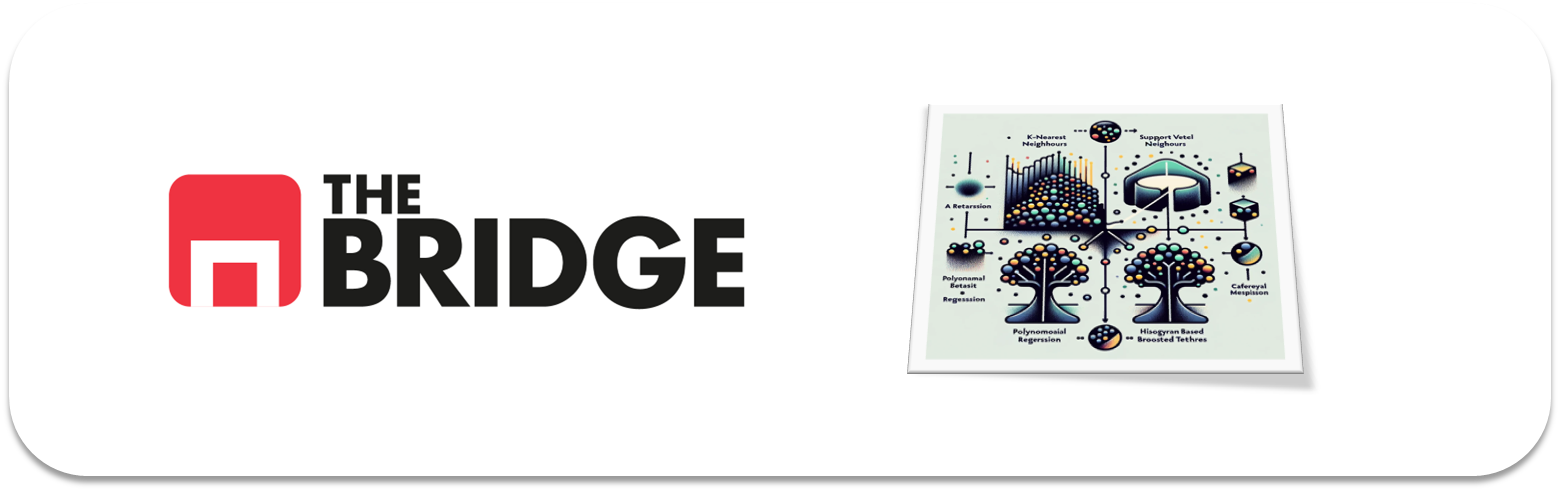

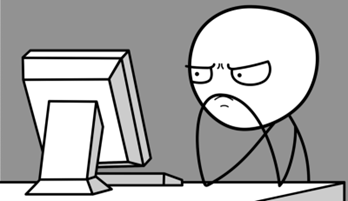

Para ejercitarte y afianzar lo aprendido sobre **Otros Modelos de aprendizaje supervisado**, completa los siguientes ejercicios. Recuerda que necesitarás datos que están en el directorio data que acompaña al notebook (búscalo en el repositorio de ejercicios)
  
La solución a los mismos las tienes ya, intenta no mirarlos de primeras pero no dejes de hacerlo cuando hayas terminado por si te pudieran aportar.

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook

In [1]:
# Librerías esenciales
import pandas as pd  # Manejo de datos
import numpy as np  # Cálculos numéricos
import matplotlib.pyplot as plt  # Visualización
import seaborn as sns  # Gráficos avanzados

# Preprocesamiento de datos
from sklearn.model_selection import train_test_split  # División de datos
from sklearn.preprocessing import StandardScaler  # Escalado de datos
from sklearn.preprocessing import LabelEncoder  # Codificación de variables categóricas

# Algoritmo KNN y optimización
from sklearn.neighbors import KNeighborsClassifier  # Algoritmo KNN
from sklearn.model_selection import GridSearchCV  # Búsqueda de hiperparámetros
from sklearn.metrics import accuracy_score, balanced_accuracy_score, classification_report  # Métricas de evaluación

# Configuración de visualización
sns.set_style("whitegrid")  # Estilo de gráficos

print("Paquetes importados correctamente.")

Paquetes importados correctamente.


## PARTE 1. KNN

En la primera parte  vas a trabajar con una base de datos de reviews de una aplicación. Entre los datos podemos encontrar el texto de la review, las estrellas, así como el sentimiento del comentario (si es algo bueno o malo).

El objetivo es montar un algoritmo de clasificación que prediga el rating (ojo, no el sentimiento), en función del sentimiento del comentario y su valor y la cantidad de palabras empleadas en el mismo. Para ello tendrás que utilizar un algoritmo de tipo KNN.

### Ejercicio 1

Lee el archivo de entrada "reviews_sentiment.csv" y carga su contenido en un dataframe. Muestras sus primeras líneas, su información general y define una variable "target" asignándole el nombre de la columna que contenga el target del problema. 

In [4]:
import pandas as pd

# Ruta del archivo en tu sistema
file_path = r"C:\Users\mario\Documents\GitHub\ONLINE_DS_THEBRIDGE_27MarioGomez\04_Machine_Learning\Sprint_12\Unidad_01\Ejercicios_Workout\data\reviews_sentiment.csv"

# Cargar el dataset especificando el delimitador correcto (;)
df = pd.read_csv(file_path, delimiter=";", encoding="utf-8")

# Mostrar primeras filas y validar la carga
display(df.head())

# Mostrar información general del dataset
print("\nInformación del dataset:")
df.info()

# Verificar si hay valores nulos en el dataset
print("\nValores nulos por columna:")
print(df.isnull().sum())

# Definir la variable target
target = "Star Rating"  # Parece ser la columna objetivo
print(f"\nLa columna target seleccionada es: {target}")


,Review Title,Review Text,wordcount,titleSentiment,textSentiment,Star Rating,sentimentValue
0,Sin conexión,Hola desde hace algo más de un mes me pone sin...,23,negative,negative,1,-0.486389
1,faltan cosas,Han mejorado la apariencia pero no,20,negative,negative,1,-0.586187
2,Es muy buena lo recomiendo,Andres e puto amoooo,4,NaN,negative,1,-0.602240
3,Version antigua,Me gustana mas la version anterior esta es mas...,17,NaN,negative,1,-0.616271
4,Esta bien,Sin ser la biblia.... Esta bien,6,negative,negative,1,-0.651784



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257 entries, 0 to 256
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Review Title    257 non-null    object 
 1   Review Text     257 non-null    object 
 2   wordcount       257 non-null    int64  
 3   titleSentiment  231 non-null    object 
 4   textSentiment   257 non-null    object 
 5   Star Rating     257 non-null    int64  
 6   sentimentValue  257 non-null    float64
dtypes: float64(1), int64(2), object(4)
memory usage: 14.2+ KB

Valores nulos por columna:
Review Title       0
Review Text        0
wordcount          0
titleSentiment    26
textSentiment      0
Star Rating        0
sentimentValue     0
dtype: int64

La columna target seleccionada es: Star Rating


### Ejericicio 2

Muestra la distribución del target y coméntala brevemente.

Distribución de la variable target (% de cada clase):
Star Rating
5    34.241245
3    30.350195
1    14.396887
4    11.673152
2     9.338521
Name: proportion, dtype: float64


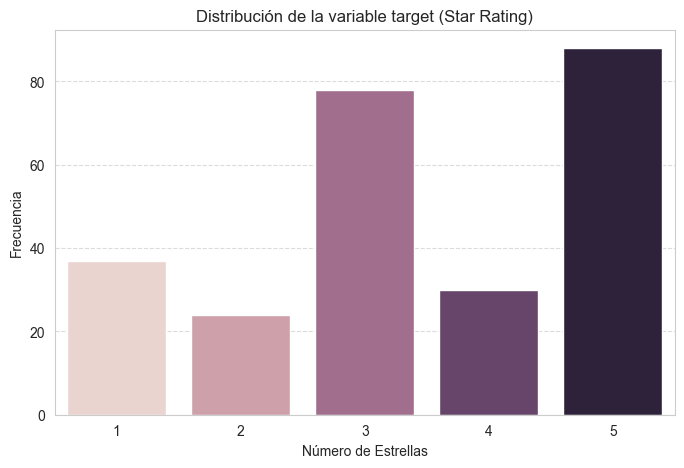

In [6]:
# Visualizar la distribución del target sin warning
plt.figure(figsize=(8,5))
sns.countplot(x=df[target], hue=df[target], legend=False)

# Mostrar los valores únicos y sus conteos
print("Distribución de la variable target (% de cada clase):")
print(df[target].value_counts(normalize=True) * 100)

# Personalizar gráfico
plt.title("Distribución de la variable target (Star Rating)")
plt.xlabel("Número de Estrellas")
plt.ylabel("Frecuencia")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


### Ejercicio 3

Deshazte de la columna "titleSentiment" que tiene nulos y no vamos a emplearla.

In [7]:
# Verificar cuántos valores nulos tiene la columna antes de eliminarla
print(f"Valores nulos en 'titleSentiment': {df['titleSentiment'].isnull().sum()}")

# Eliminar la columna
df.drop(columns=["titleSentiment"], inplace=True)

# Confirmar eliminación
print("\nColumna 'titleSentiment' eliminada. Columnas actuales en el dataframe:")
print(df.columns)


Valores nulos en 'titleSentiment': 26

Columna 'titleSentiment' eliminada. Columnas actuales en el dataframe:
Index(['Review Title', 'Review Text', 'wordcount', 'textSentiment',
       'Star Rating', 'sentimentValue'],
      dtype='object')


### Ejercicio 4

Haz el split en train y test.

In [8]:
# Definir variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=[target])  # Eliminamos la columna target de las features
y = df[target]  # Guardamos la variable objetivo

# Dividir los datos en 80% entrenamiento y 20% prueba, estratificando según el target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Mostrar tamaños de los conjuntos resultantes
print(f"Tamaño del dataset de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del dataset de prueba: {X_test.shape[0]} muestras")


Tamaño del dataset de entrenamiento: 205 muestras
Tamaño del dataset de prueba: 52 muestras


### Ejercicio 5

Muestra la descripción de las variables que consideres numéricas (justificando tu elección) y sus histogramas. ¿Hay que aplicar alguna transformación o tratamiento? (Recuerda que vamos a emplear un KNN)

Descripción de las variables numéricas:


,wordcount,sentimentValue
count,257.000000,257.000000
mean,11.501946,0.383849
std,13.159812,0.897987
min,1.000000,-2.276469
25%,3.000000,-0.108144
50%,7.000000,0.264091
75%,16.000000,0.808384
max,103.000000,3.264579


<Figure size 1200x600 with 0 Axes>

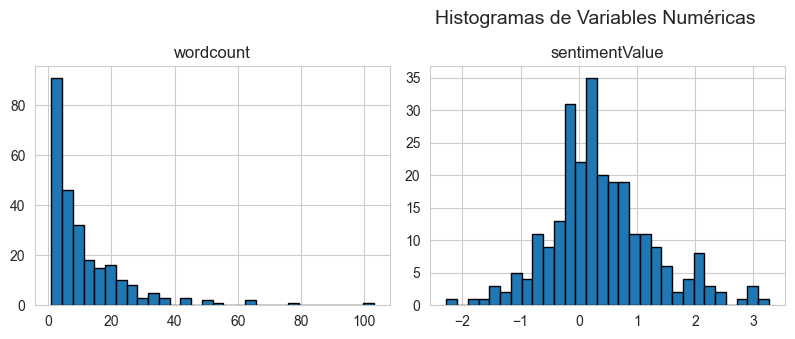

In [9]:
# Obtener la descripción estadística de las variables numéricas
numerical_features = X.select_dtypes(include=["int64", "float64"])
print("Descripción de las variables numéricas:")
display(numerical_features.describe())

# Visualización de histogramas para analizar la distribución
plt.figure(figsize=(12, 6))
numerical_features.hist(bins=30, figsize=(12, 6), layout=(2, 3), edgecolor='black')

# Ajustes visuales
plt.suptitle("Histogramas de Variables Numéricas", fontsize=14)
plt.tight_layout()
plt.show()


In [10]:
# Aplicar StandardScaler a las variables numéricas
scaler = StandardScaler()

# Ajustar y transformar solo las variables numéricas
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features.columns] = scaler.fit_transform(X_train[numerical_features.columns])
X_test_scaled[numerical_features.columns] = scaler.transform(X_test[numerical_features.columns])

print("Escalado aplicado correctamente.")


Escalado aplicado correctamente.


### Ejercicio 6

Muestra la distribución frecuencial de las variables que consideres categóricas. ¿Habrías que hacerles algún tipo de tratamiento?

C:\Users\mario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


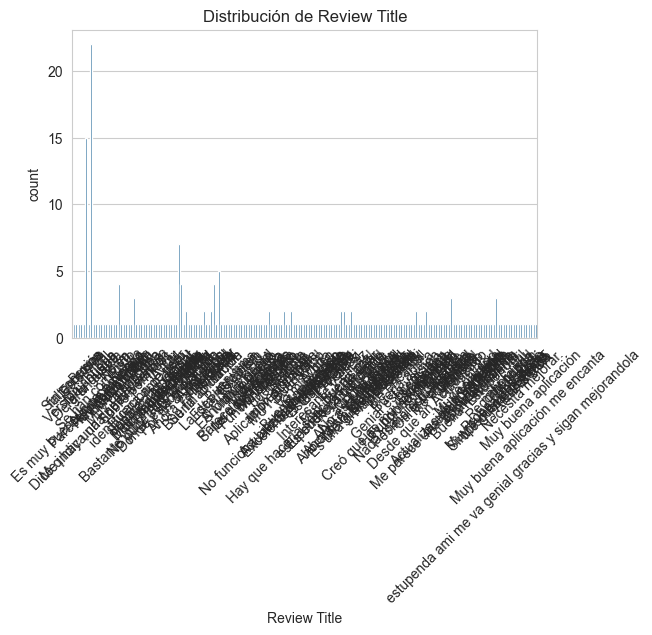

C:\Users\mario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128514 (\N{FACE WITH TEARS OF JOY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\mario\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


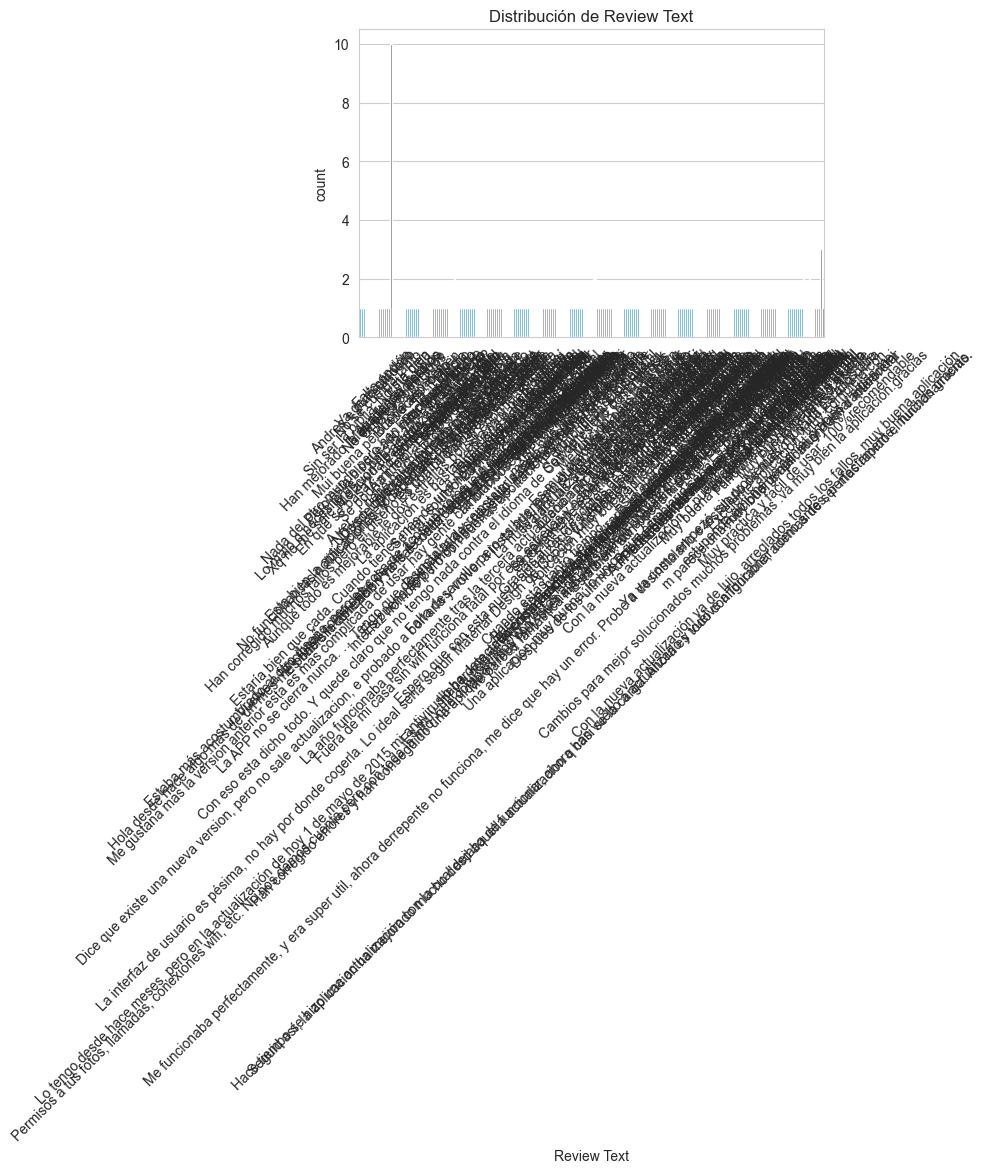

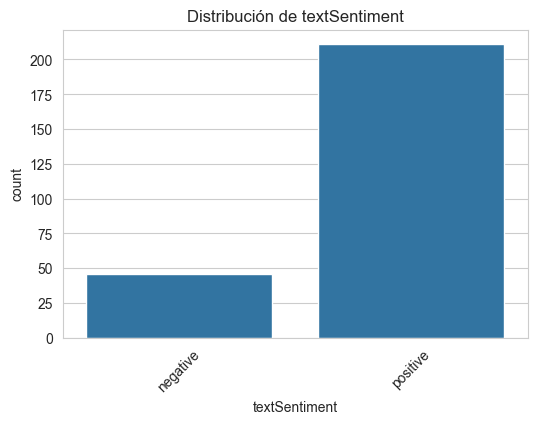


Valores únicos en Review Title:
Review Title
Muy buena              22
Buena                  15
Genial                  7
Muy util                5
Me gusta                4
                       ..
Si pero con mejoras     1
muy bueno               1
Muy bueno               1
Le doy por ahora        1
Sg S5                   1
Name: count, Length: 186, dtype: int64

Valores únicos en Review Text:
Review Text
…                                                                                                                            10
Genial                                                                                                                        3
Muy bueno                                                                                                                     2
Muy buena                                                                                                                     2
Muy buena app                                                            

In [11]:
# Identificar variables categóricas
categorical_features = X.select_dtypes(include=["object"])

# Mostrar distribución de las variables categóricas
for col in categorical_features.columns:
    plt.figure(figsize=(6, 4))
    sns.countplot(x=categorical_features[col])
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.show()

# Mostrar valores únicos en cada categoría
for col in categorical_features.columns:
    print(f"\nValores únicos en {col}:")
    print(categorical_features[col].value_counts())


In [12]:
# Eliminar las columnas de texto no útiles
X_train_scaled.drop(columns=["Review Title", "Review Text"], inplace=True)
X_test_scaled.drop(columns=["Review Title", "Review Text"], inplace=True)

# Convertir 'textSentiment' en variable numérica binaria
X_train_scaled["textSentiment"] = X_train_scaled["textSentiment"].map({"positive": 1, "negative": 0})
X_test_scaled["textSentiment"] = X_test_scaled["textSentiment"].map({"positive": 1, "negative": 0})

print("Tratamiento aplicado:\n - Eliminadas 'Review Title' y 'Review Text'\n - Codificada 'textSentiment' como binaria (1=positive, 0=negative).")


Tratamiento aplicado:
 - Eliminadas 'Review Title' y 'Review Text'
 - Codificada 'textSentiment' como binaria (1=positive, 0=negative).


### Ejercicio 7

En un modelado completo habríamos comprobado la relación entre las features y el targer, para estos ejercicios, las vamos a incluir sí o si. Haz el tratamiento de features, haciendo la conversión ordinal de la binaria (usa 1 para positive y 0 para negative) y aplicando el escalado que creas más conveniente en consecuencia para las numéricas

In [13]:
# Aplicar escalado a las variables numéricas
scaler = StandardScaler()

# Lista de columnas numéricas después del preprocesamiento
numeric_features = ["wordcount", "sentimentValue"]  # Confirmadas en Ejercicio 5

# Aplicar escalado
X_train_scaled[numeric_features] = scaler.fit_transform(X_train_scaled[numeric_features])
X_test_scaled[numeric_features] = scaler.transform(X_test_scaled[numeric_features])

# Confirmar que el escalado y el tratamiento de features fue aplicado
print("Escalado aplicado a variables numéricas:", numeric_features)
print("\nPrimeras filas de X_train_scaled después del preprocesamiento:")
display(X_train_scaled.head())


Escalado aplicado a variables numéricas: ['wordcount', 'sentimentValue']

Primeras filas de X_train_scaled después del preprocesamiento:


,wordcount,textSentiment,sentimentValue
8,0.687231,0,-1.319833
70,-0.768918,1,-0.674326
16,1.051269,0,-1.716337
84,1.196884,0,-0.900562
33,3.745145,0,-1.175983


### Ejercicio 8

Crea el juego X,y de train y test. Carga el modelo, instancialo con un k=5 para empezar y entrénalo.

In [14]:
# Instanciar el modelo KNN con k=5
knn_model = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo con los datos de entrenamiento escalados
knn_model.fit(X_train_scaled, y_train)

print("Modelo KNN entrenado correctamente con k=5.")


Modelo KNN entrenado correctamente con k=5.


### Ejercicio 9

Evalúalo contra el propio train y contra test, ¿qué puedes decir de los resultados?

In [15]:
# Hacer predicciones en el conjunto de entrenamiento y prueba
y_train_pred = knn_model.predict(X_train_scaled)
y_test_pred = knn_model.predict(X_test_scaled)

# Calcular métricas de evaluación
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
balanced_train_accuracy = balanced_accuracy_score(y_train, y_train_pred)
balanced_test_accuracy = balanced_accuracy_score(y_test, y_test_pred)

# Mostrar resultados
print(f"Exactitud (Accuracy) en Train: {train_accuracy:.4f}")
print(f"Exactitud (Accuracy) en Test: {test_accuracy:.4f}")
print(f"Balanced Accuracy en Train: {balanced_train_accuracy:.4f}")
print(f"Balanced Accuracy en Test: {balanced_test_accuracy:.4f}")

# Mostrar reporte de clasificación
print("\nReporte de clasificación en Test:")
print(classification_report(y_test, y_test_pred))


Exactitud (Accuracy) en Train: 0.9024
Exactitud (Accuracy) en Test: 0.8846
Balanced Accuracy en Train: 0.8691
Balanced Accuracy en Test: 0.8794

Reporte de clasificación en Test:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      0.80      0.89         5
           3       0.82      0.88      0.85        16
           4       0.83      0.83      0.83         6
           5       0.89      0.89      0.89        18

    accuracy                           0.88        52
   macro avg       0.91      0.88      0.89        52
weighted avg       0.89      0.88      0.89        52



### Ejercicio 10

Vamos a "ajustar a mano" el valor de K, probando diferentes valores entre 1 y 20. Para ello haz un bucle que cambie el valor de K y obtenga mediante validación cruzada el valor del "balanced accuracy" para cada "modelo" y se quede con el k que mejor métrica obtenga. Luego entrena un modelo para ese k y evalúalo contra el target.


Mejor valor de k según Balanced Accuracy: 3


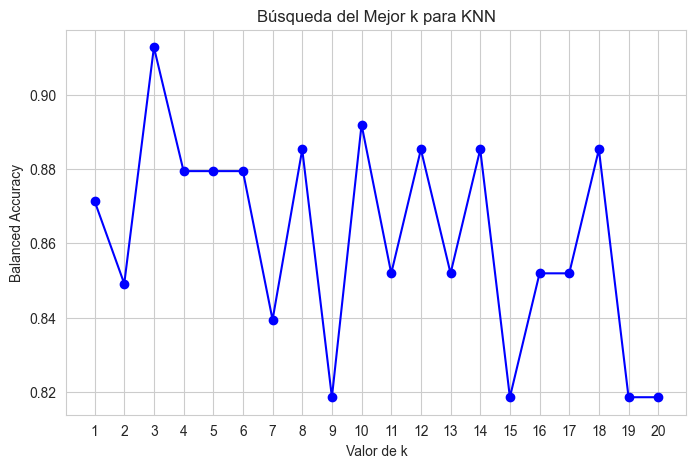

In [16]:
# Probar diferentes valores de k entre 1 y 20
k_values = range(1, 21)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_val_pred = knn.predict(X_test_scaled)
    
    # Calcular balanced accuracy
    score = balanced_accuracy_score(y_test, y_val_pred)
    scores.append(score)

# Encontrar el mejor k
best_k = k_values[scores.index(max(scores))]
print(f"\nMejor valor de k según Balanced Accuracy: {best_k}")

# Visualizar el rendimiento
plt.figure(figsize=(8, 5))
plt.plot(k_values, scores, marker='o', linestyle='-', color='b')
plt.xlabel("Valor de k")
plt.ylabel("Balanced Accuracy")
plt.title("Búsqueda del Mejor k para KNN")
plt.xticks(k_values)
plt.grid(True)
plt.show()



### Ejercicio 11

Repasa la ficha de KNN o la documentación de sklearn y, usando un grid y una estrategia completa (GridSearch), busca la mejor combinación de k y weights que puedas, empleando de nuevo "balanced_accuracy" como métrica.

In [17]:
from sklearn.model_selection import GridSearchCV

# Definir los valores de k y pesos a probar
param_grid = {
    "n_neighbors": list(range(1, 21)),  # Probar valores de k entre 1 y 20
    "weights": ["uniform", "distance"]  # Comparar pesos uniformes vs ponderados
}

# Instanciar el modelo KNN
knn = KNeighborsClassifier()

# GridSearch con validación cruzada
grid_search = GridSearchCV(knn, param_grid, scoring="balanced_accuracy", cv=5, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

# Mejor combinación encontrada
best_k = grid_search.best_params_["n_neighbors"]
best_weights = grid_search.best_params_["weights"]
best_score = grid_search.best_score_

print(f"\nMejor k encontrado: {best_k}")
print(f"Mejor tipo de weights: {best_weights}")
print(f"Balanced Accuracy en validación cruzada: {best_score:.4f}")

# Entrenar modelo con mejores parámetros
best_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)
best_knn.fit(X_train_scaled, y_train)

# Evaluar en test
y_test_pred = best_knn.predict(X_test_scaled)
final_test_score = balanced_accuracy_score(y_test, y_test_pred)

print(f"\nBalanced Accuracy en Test con mejor modelo: {final_test_score:.4f}")



Mejor k encontrado: 4
Mejor tipo de weights: uniform
Balanced Accuracy en validación cruzada: 0.8414

Balanced Accuracy en Test con mejor modelo: 0.8794
